In [1]:
import numpy as np

class LinearRegression:
    def __init__(self, lr = 0.001, n_iters = 1000 ):# iter means iteration
        self.lr = lr
        self.n_iters = n_iters
        self.weight = None
        self.bias = None
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weight = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            print(_,"_______")
            y_pred = np.dot(X, self.weight) + self.bias
            print("y_pred ", y_pred)
            #the actual formula is w = dw = 1/n * sigma(i = 1, n){2*Xi*(y_pred -Yi)}
            #because dot product definition in numpy includes the summation so it basically one number when we do this calculation
            #so we don't need "2"
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            print("dw ", dw)
            # if want to know what is X.T, just looking at the X value and Y value, X.T will make X become as same datatype as Y
            db = (1/n_samples) * np.sum(y_pred - y)
            print("db ", db)
            
            self.weight = self.weight - self.lr * dw
            print("self.weight: ", self.weight)
            self.bias = self.bias - self.lr * db
            print("self.bias: ", self.bias)
       
    def predict(self, X):
        y_pred = np.dot(X, self.weight) + self.bias
        return y_pred

[[-1.3474603 ]
 [ 0.3523434 ]
 [ 0.9546986 ]
 [ 0.03592805]
 [ 0.04800625]
 [ 0.04860301]
 [ 0.72334161]
 [ 0.80208661]
 [-1.14379857]
 [ 0.17941071]
 [-0.64770677]
 [-1.11281215]
 [-1.58457724]
 [-0.08798693]
 [ 2.47658416]
 [-0.7322647 ]
 [ 1.54697933]
 [-0.13070464]
 [ 0.30044554]
 [-0.9443686 ]
 [-0.30296397]
 [-0.37444492]
 [-1.15681626]
 [ 0.59857517]
 [-2.37977527]
 [-0.60768369]
 [ 0.54245131]
 [ 2.02240507]
 [ 0.04613557]
 [ 0.52324766]
 [ 0.29714121]
 [-1.54292905]
 [ 1.69235772]
 [ 0.20931349]
 [-0.41830152]
 [ 0.87084178]
 [-1.14747663]
 [-0.17521053]
 [-0.9617768 ]
 [ 0.1886462 ]
 [ 1.20200259]
 [ 1.99008302]
 [-1.36096559]
 [-0.05455871]
 [ 1.16418756]
 [-1.45553433]
 [ 0.01908996]
 [-0.77873992]
 [ 0.03754749]
 [-0.34610187]
 [-0.65122583]
 [ 0.15846954]
 [-1.20894816]
 [-0.64764453]
 [ 0.91484096]
 [-1.84087587]
 [ 0.49995133]
 [ 1.27181862]
 [ 0.69359851]
 [ 0.55618522]
 [ 0.4250724 ]
 [-1.09712188]
 [-0.5648753 ]
 [ 0.35099715]
 [ 0.83783635]
 [ 0.05443274]
 [-0.00936

<function matplotlib.pyplot.show(close=None, block=None)>

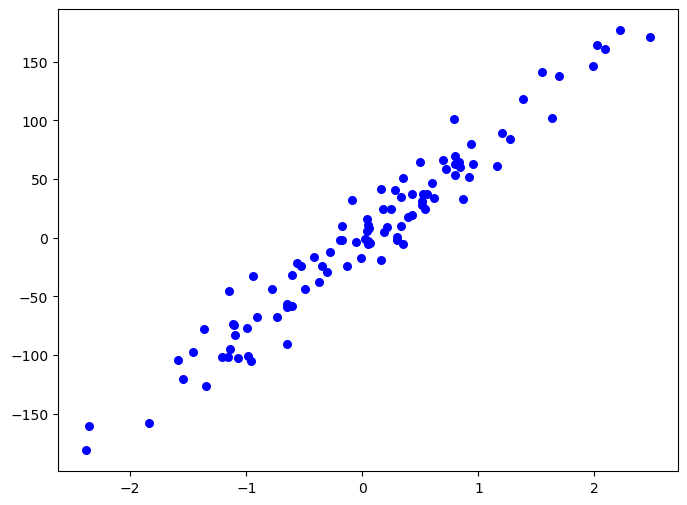

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 4)
print(X)
print(X.T)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30)
plt.show

In [3]:
reg = LinearRegression(lr = 0.01, n_iters = 5)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
print(predictions)
#calculate mean squared error
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mean_squared_error = mse(y_test, predictions)
print(mean_squared_error)

0 _______
y_pred  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
dw  [-75.94774682]
db  -1.1954486355484186
self.weight:  [0.75947747]
self.bias:  0.011954486355484186
1 _______
y_pred  [ 0.14821288  0.13230853  0.4093493   1.05997271  0.26429326  1.70054647
 -0.41705557  0.0048457   1.25426789  0.04047096  0.04841415  0.64827232
 -0.47996421  0.19624941  0.97787207 -0.11826902 -0.85952816  0.6211212
  0.70675558 -0.38919853 -0.27242799  0.24013611  0.61591675  0.64727919
 -0.8666214   0.56131614  0.89612871 -0.85673476  1.5233777   1.18685043
 -1.09349104 -0.21813982 -0.44956759 -1.38614926  0.33873587 -1.15986536
 -0.19781574  0.04886737 -0.80470411  1.29726204 -0.9062144  -0.0548696
 -0.67570538 -0.08731274  0.04699341  0.02645288  0.33478739  1.89286436
  0.05329493 -1.19149622 -0.705272

<function matplotlib.pyplot.show(close=None, block=None)>

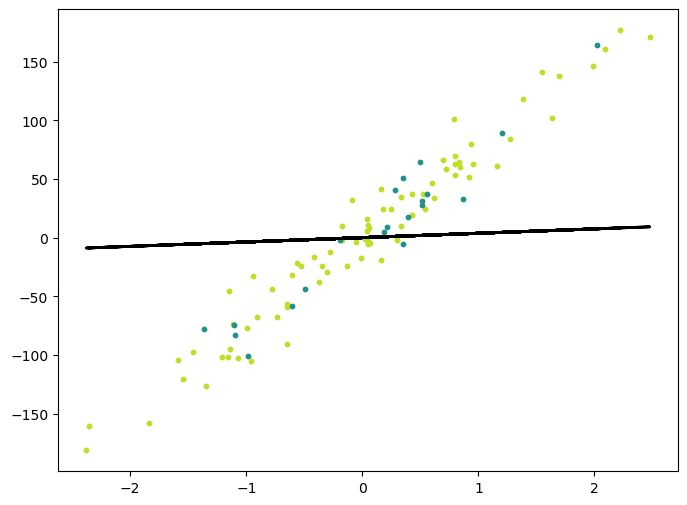

In [4]:
y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize = (8,6))
m1 = plt.scatter(X_train, y_train, color = cmap(0.9), s = 10)
m2 = plt.scatter(X_test, y_test, color = cmap(0.5), s = 10)
plt.plot(X, y_pred_line, color = 'black', linewidth = 2, label = 'Prediction')
plt.show